1.  Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.
- Here we want clustering of the country based on there similar economic and social status 

2.  Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

In [75]:
import numpy as np , pandas as pd ,matplotlib.pyplot as plt

In [76]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- Country data consists of the various economic and social factor of 167 countries across the globe . One of the NGO wants to help some country with some funds and they need the name of country which needs the money most .

In [78]:
num_col = data.columns[data.dtypes!=np.object]

In [79]:
data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


- All above variable are quantitative in nature and there descriptive statistics are represented above

3. Brief summary of data exploration and actions taken for data cleaning orfeature engineering.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A742944EB0>,
      dtype=object)

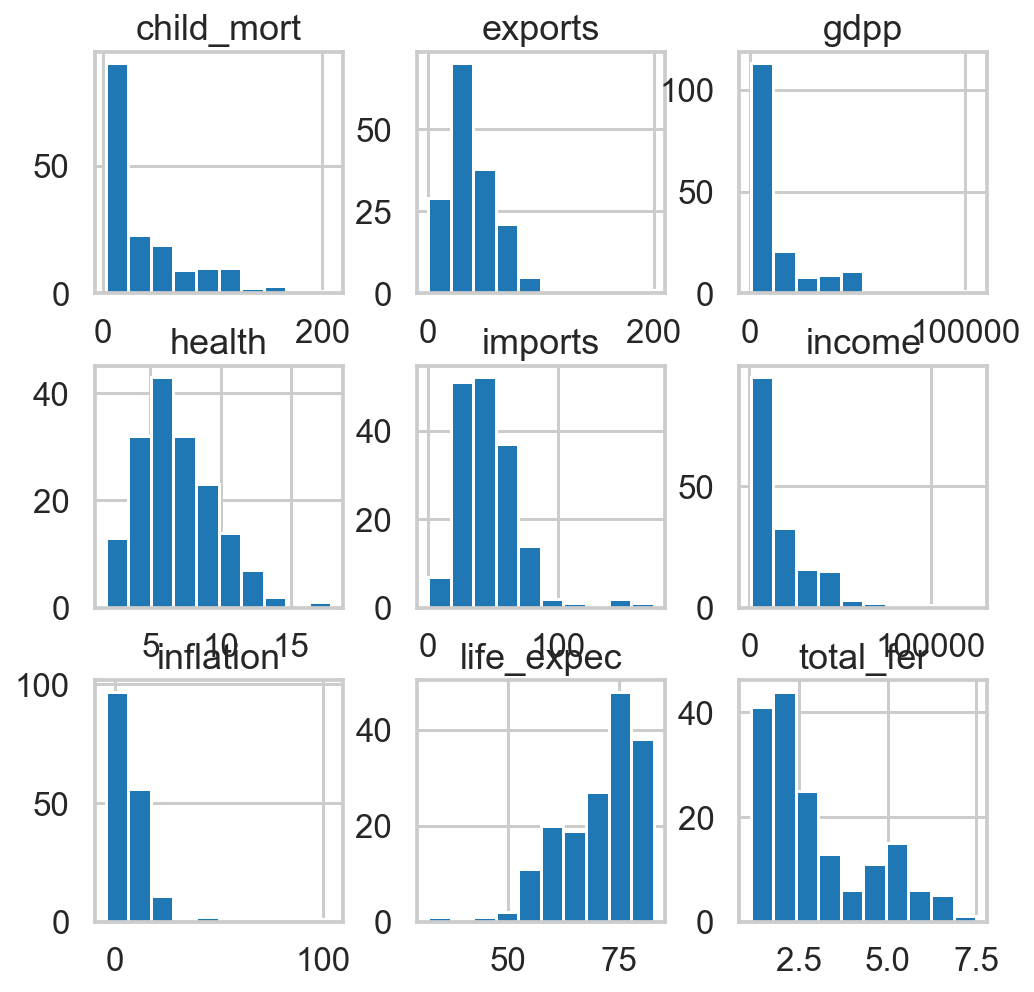

In [80]:
data[num_col].hist(figsize = (8,8))

In [81]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
X_tr = pd.DataFrame(s.fit_transform(data[num_col]))
X_tr.columns = num_col
X_tr

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [82]:
data_tr = pd.concat([data[['country']] ,X_tr] ,axis = 1)
data_tr.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


4. Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.

In [83]:
data_tr[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,0.173661,0.196343,0.0,0.027507,0.081305,0.289679,1.0
exports,167.0,0.205112,0.137135,0.0,0.118520,0.174550,0.256345,1.0
health,167.0,0.311106,0.170717,0.0,0.193288,0.280298,0.422001,1.0
imports,167.0,0.269207,0.139188,0.0,0.173250,0.248566,0.337393,1.0
income,167.0,0.132933,0.154980,0.0,0.022076,0.075174,0.178397,1.0
inflation,167.0,0.110820,0.097687,0.0,0.055633,0.088716,0.138250,1.0
life_expec,167.0,0.758495,0.175408,0.0,0.654832,0.808679,0.881657,1.0
total_fer,167.0,0.283591,0.238777,0.0,0.101735,0.198738,0.430599,1.0
gdpp,167.0,0.121536,0.174944,0.0,0.010490,0.042274,0.131900,1.0


([<matplotlib.axis.XTick at 0x1a747faa130>,
 <a list of 18 Text major ticklabel objects>)

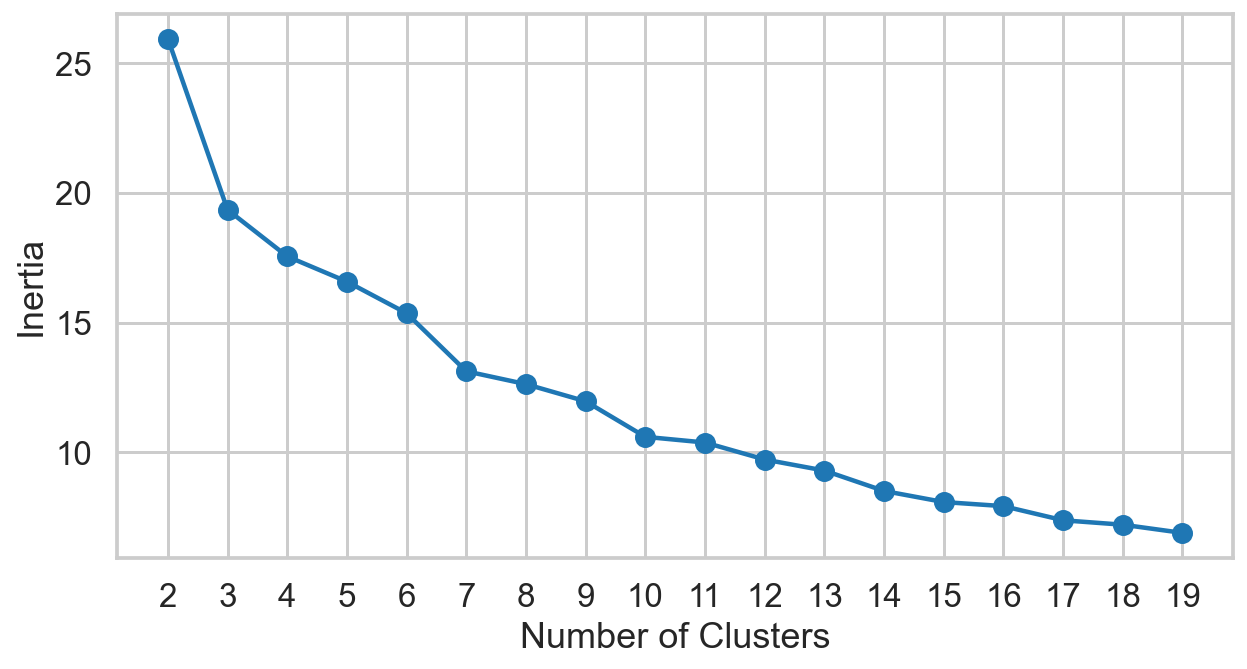

In [84]:
# Setup and imports
# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']
plt.rcParams['figure.figsize'] = [10,5]
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

inertia = []
scores = []
from sklearn.cluster import KMeans
num_clusters = list(range(2,20))

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
for i in num_clusters:
    km  =  KMeans(n_clusters = i,random_state=10,n_init=1)
    km.fit(X_tr)
    inertia.append(km.inertia_)
    score = silhouette_score(X, km.labels_, metric='euclidean')
    scores.append(score)

plt.plot(num_clusters,inertia)
plt.scatter(num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
plt.xticks(num_clusters)

- Here the elbow method does not yield a clear decision (i.e. the elbow is not clear and sharp, or is ambiguous). In this  case, we try alternatives such as the silhouette coefficient.

([<matplotlib.axis.XTick at 0x1a74840ab20>,
 <a list of 18 Text major ticklabel objects>)

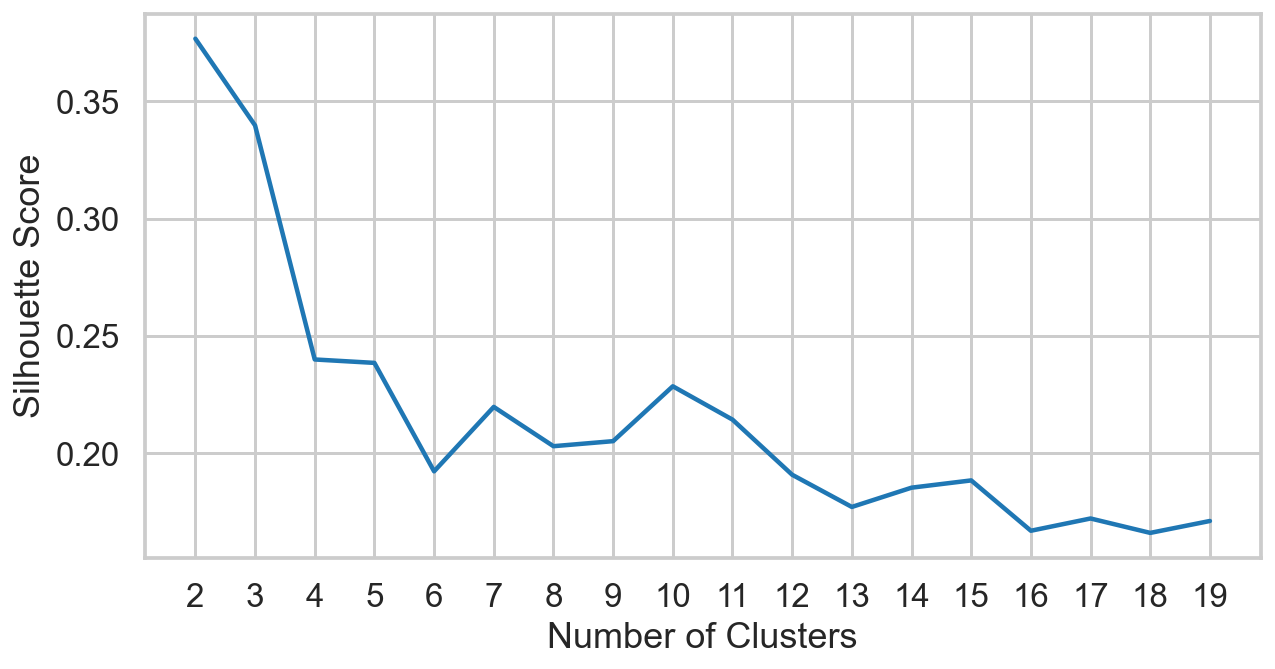

In [85]:
plt.plot(num_clusters ,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');
plt.xticks(num_clusters)

In [86]:
km  =  KMeans(n_clusters = 5,random_state=10,n_init=1)
data['kmeans'] = km.fit_predict(X_tr)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [92]:
data.kmeans.value_counts()

1    69
0    33
3    32
2    24
4     9
Name: kmeans, dtype: int64

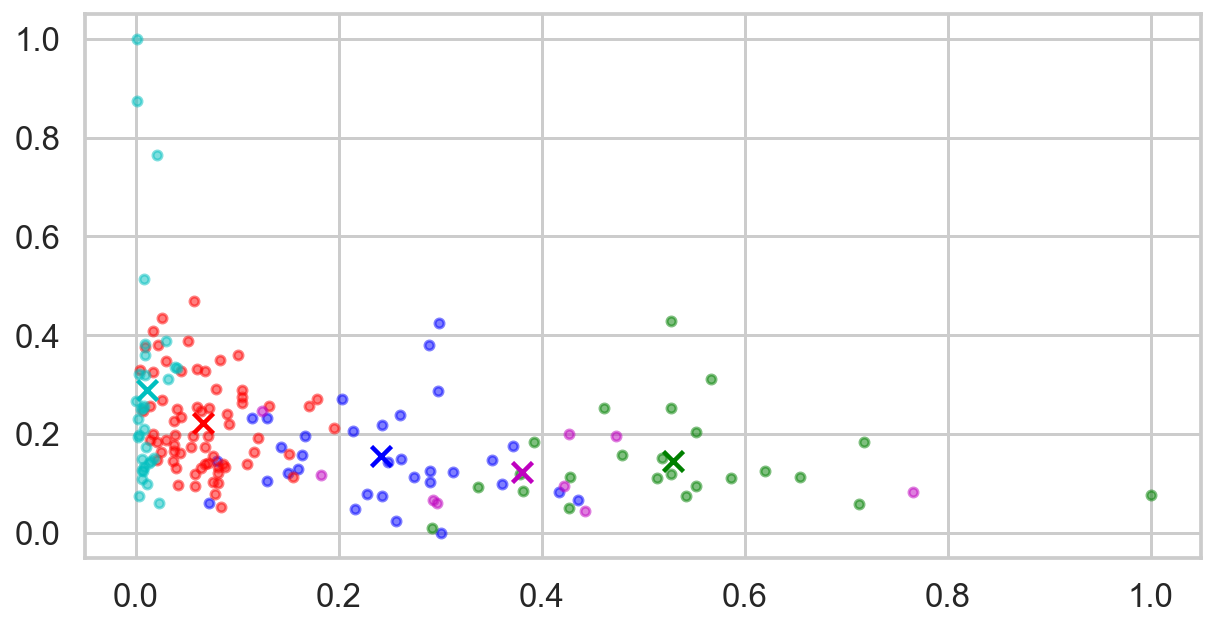

In [98]:
X = np.array(X_tr)
color = 'brgcmyk'
alpha = 0.5
s = 20

for i in range(num_clusters):
    plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
    plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [87]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_full_tree=True)
ag = ag.fit(X_tr)
data['agglom'] = ag.fit_predict(X_tr)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,agglom
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,2


In [89]:
data.agglom.value_counts()

2    68
1    41
0    31
4    24
3     3
Name: agglom, dtype: int64

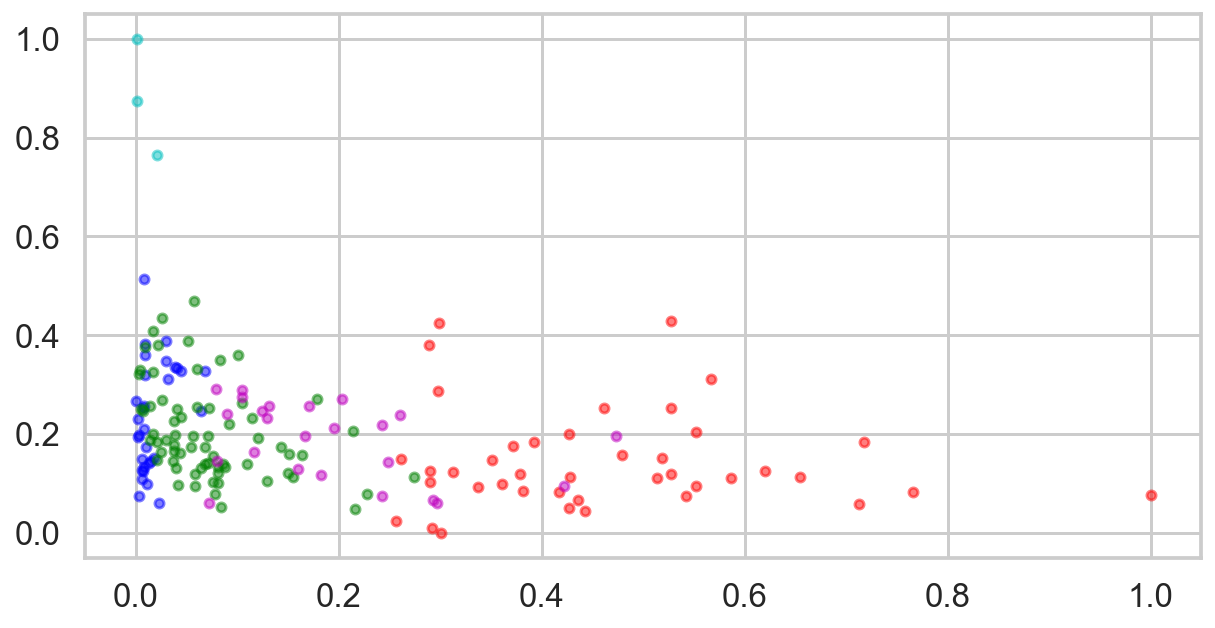

In [100]:
X = np.array(X_tr)
color = 'brgcmyk'
alpha = 0.5
s = 20

for i in range(num_clusters):
    plt.scatter(X[ag.labels_==i,0],X[ag.labels_==i,1],c = color[i],alpha = alpha,s=s)

5. A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms. Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.
- We have Kmean clustering algorithm with different number of cluster ranging from 2 to 40 . After then we have checked the elbow plot and silhouette score and analysing them , I found that 5 number of cluster is optimum for the data set partition or segmentation . Further we have also fitted Agglomerative Clustering or Hierarchical clustering with same number of cluster i.e. 5 . We have found similar result approximately like kmean but one advantage with Agglomerative is that it is reproducible . So , we consider Hierarchical or Agglomerative clustering partition as final clustes 
6. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.
- In next step one can analyse by checking other clustering algorithm to investigate some uniqueness property of data